# Average Re-sell Prices Of Common Used Cars
In this project, we want to find out the most popular used car that people often resell and whether brand, mileages and cosmestic impact its resell price.<br>

We will use used cars data from eBay Kleinanzeige downloaded from Dataquest. This data was originally published publicly on [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data) 
with more data. However, we will use the one from Dataquest with 50,000 data points sampling from the full dataset.<br>

To reach the goal of this project, we need to analyze the data set and answer:
1. Which is the most common brand/model combinations?
2. How does brand, mileage and cosmestic impact the resell prices?

As a result of analysis, Volkswagen is the most common brand in the listings.<br>
Brand, mileage and damages are factored into the re-sell price.

In [1]:
# Read in data as DataFrame
import pandas as pd
autos = pd.read_csv('autos.csv', encoding = 'Latin-1', 
                    parse_dates=['dateCrawled', 'dateCreated','lastSeen'])
print('Number of rows: ',autos.shape[0])
autos.head()

Number of rows:  50000


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01,0,39218,2016-04-01 14:38:50


Each row is an advertisement providing information about the used car. Most of the columns have intuitive meanings except:
- dateCrawled - the date when remaining data were taken and when the ad was first crawled.
- dateCreated - the date on which the eBay listing was created
- lastSeenOnline - When the crawler saw this ad last online

## Data Cleaning

In [2]:
# Overview of data in each column
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          50000 non-null  datetime64[ns]
 1   name                 50000 non-null  object        
 2   seller               50000 non-null  object        
 3   offerType            50000 non-null  object        
 4   price                50000 non-null  object        
 5   abtest               50000 non-null  object        
 6   vehicleType          44905 non-null  object        
 7   yearOfRegistration   50000 non-null  int64         
 8   gearbox              47320 non-null  object        
 9   powerPS              50000 non-null  int64         
 10  model                47242 non-null  object        
 11  odometer             50000 non-null  object        
 12  monthOfRegistration  50000 non-null  int64         
 13  fuelType             45518 non-

In [3]:
autos.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-12 16:06:22,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
first,2016-03-05 14:06:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-11 00:00:00,NaN,NaN,2016-03-05 14:45:46
last,2016-04-07 14:36:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-07 00:00:00,NaN,NaN,2016-04-07 14:58:50
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN


From the frequency, we can see that seller and offerType have mainly only one value 'privat' and 'Angebot' respectively. As we don't need the information from these columns for this project, we will drop it.<br>

The 'price' and 'odometer' columns aren't in numeric type, we need to convert it.<br>

The 'registration_year' has a min value of 1000, which doesn't make sense. We need to investigate this column further.

### Drop irrelevant columns

In [4]:
autos.drop(['seller','offerType'], axis = 1, inplace = True)

### Convert to numeric type

In [5]:
# check pattern of values in price column
autos['price'].value_counts()

$0         1421
$500        781
$1,500      734
$2,500      643
$1,000      639
           ... 
$5,998        1
$31,313       1
$2,549        1
$61,999       1
$4,860        1
Name: price, Length: 2357, dtype: int64

In [6]:
# remove non-numerical character
autos['price'] = (autos['price']
                  .str.replace(r'[^\d]','')
                  .astype(int))

In [7]:
# check pattern of values in odometer column
autos['odometer'].value_counts()

150,000km    32424
125,000km     5170
100,000km     2169
90,000km      1757
80,000km      1436
70,000km      1230
60,000km      1164
50,000km      1027
5,000km        967
40,000km       819
30,000km       789
20,000km       784
10,000km       264
Name: odometer, dtype: int64

In [8]:
# remove non-numerical character
autos['odometer'] = (autos['odometer']
                     .str.replace(r'[^\d]','')
                     .astype(int))

### Rename columns
We will rename the columns to be more user friendly

In [9]:
# Rename columns to be easier to read
autos.rename(columns={'yearOfRegistration':'registration_year',
                     'monthOfRegistration':'registration_month',
                     'notRepairedDamage':'unrepaired_damage',
                      'odometer':'odometer_km',
                     'dateCreated':'ad_created',
                     'dateCrawled':'date_crawled',
                     'offerType':'offer_type',
                     'vehicleType':'vehicle_type',
                     'fuelType':'fuel_type',
                     'dateCreated':'date_created',
                     'nrOfPictures':'number_of_pics',
                     'postalCode':'postal_code',
                     'lastseen':'last_seen'}, inplace = True)

### Review price column after removing non-numerical characters

In [10]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # don't show scientific notation
autos['price'].describe()

count      50000.00
mean        9840.04
std       481104.38
min            0.00
25%         1100.00
50%         2950.00
75%         7200.00
max     99999999.00
Name: price, dtype: float64

The min and max values in this column are odd with 0 and almost $ 100M. Let's look at the the distribution of values.

In [11]:
autos['price'].value_counts().sort_index()[:20]

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: price, dtype: int64

There are 1,421 cars listed with price 0. From the data we have, there is no obvious reason. This number of cars is less than 2% of entire data set, we can remove them to increase the accuracy of analysis.<br>

Ebay is an auction site. The intial price set is not the actual sell price. Sell price could increase significantly after the auction. For this reason, we will keep values >= 1

In [12]:
autos['price'].value_counts().sort_index(ascending = False)[:20]

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

We can see that prices increase gradually to 350,000, then jump up to almost 1M. Prices that are larger than 350,000 looks unrealistic and should be removed.

In [13]:
autos = autos[(autos['price'] > 0) & (autos['price']<=350000)]

In [14]:
autos['price'].describe()

count    48565.00
mean      5888.94
std       9059.85
min          1.00
25%       1200.00
50%       3000.00
75%       7490.00
max     350000.00
Name: price, dtype: float64

### Registration year

In [15]:
autos['registration_year'].value_counts().sort_index()

1000    1
1001    1
1111    1
1800    2
1910    5
       ..
5911    1
6200    1
8888    1
9000    1
9999    3
Name: registration_year, Length: 95, dtype: int64

In [16]:
autos['registration_year'].value_counts().sort_index()[-15:]

2015     392
2016    1220
2017    1392
2018     470
2019       2
2800       1
4100       1
4500       1
4800       1
5000       4
5911       1
6200       1
8888       1
9000       1
9999       3
Name: registration_year, dtype: int64

According to Wikipedia, car has been invented since 1886. There are five cars listed with registration year from 1000-1800 and 15 cars from 2800-9999. We should remove all these rows.

In [17]:
autos = autos[(autos['registration_year']>1900)&
              (autos['registration_year']<2800)]

## Analysis
Now that we have a clean data set, we can start answering the questions.

In [18]:
# Clean data set
print('Number of rows after cleaning data: ',autos.shape[0])
autos.head()

Number of rows after cleaning data:  48545


,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,number_of_pics,postal_code,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01,0,39218,2016-04-01 14:38:50


### Most common brand/model combinations

In [19]:
# find the distribution of brand/model
brand_freq = autos.groupby(['brand','model'])['model'].agg('count')

In [20]:
brand_freq.sort_values(ascending = False)[:20]

brand          model      
volkswagen     golf           3898
bmw            3er            2686
volkswagen     polo           1688
opel           corsa          1680
               astra          1410
volkswagen     passat         1383
audi           a4             1256
mercedes_benz  c_klasse       1161
bmw            5er            1150
mercedes_benz  e_klasse        977
audi           a3              866
               a6              818
ford           focus           793
               fiesta          752
volkswagen     transporter     689
renault        twingo          654
peugeot        2_reihe         610
mercedes_benz  a_klasse        583
smart          fortwo          572
opel           vectra          558
Name: model, dtype: int64

Among 10 most common listed used cars above:
- three models from Volkswagen: Gold is the most common one, following by Polo, Passat
- two models from BMW: 3ER hold the 2nd position in the most common listings. 5ER also in top 10.
- two models from Opel: Corsa and Astra
- one model from Audi and Mercedes_Benz: A4, C_Klasse

In [21]:
# distribution of five most common brands' listings
autos['brand'].value_counts(normalize = True)[:5]

volkswagen      0.21
opel            0.11
bmw             0.11
mercedes_benz   0.10
audi            0.09
Name: brand, dtype: float64

In general, these are most common brands occupy more than 60% of 48,545 listings. We will just focus on these brands going forward.

In [22]:
# list out five most common brands for further analysis
common_brands = list(autos['brand'].value_counts()[:5].index)
common_brands

['volkswagen', 'opel', 'bmw', 'mercedes_benz', 'audi']

In [23]:
autos_common = autos[autos['brand'].isin(common_brands)]

### Resell Price by Brand

In [24]:
autos_common.groupby('brand').agg('mean')['price']

brand
audi            9212.93
bmw             8261.38
mercedes_benz   8526.62
opel            2941.47
volkswagen      5333.20
Name: price, dtype: float64

On average, used cars with brand Opel are listed cheapest. Volkswagen is more cheaper than higher classes brands like Audi, BMW and Mercedes_Benz. With more afforable price, it somewhat explained why Volkswagen gained its popularity in the listings.

### Resell Price by Mileage

In [25]:
miles_price = (autos_common.groupby('brand').agg('mean')
               [['price','odometer_km']])

In [26]:
miles_price.sort_values('price')

,price,odometer_km
brand,,
opel,2941.47,129452.03
volkswagen,5333.20,128955.57
bmw,8261.38,132682.97
mercedes_benz,8526.62,130848.39
audi,9212.93,129492.56


The average mileages doesn't vary much. <br>

We can see Opel and Audi have about the same average mileages but Audi's average price is three times more expensive than Opel. This proves the brand name itself plays a big role in the price of the car.<br>


### Resell Price by Damage

In [27]:
autos_common['unrepaired_damage'].value_counts()

nein    21501
ja       2599
Name: unrepaired_damage, dtype: int64

unrepaied_damage column gives information whether the car has a damage which is not yet repaired. In German:
- nein: means No
- ja: means Yes

We will group the car brands and damage factor to see how average price is.

In [28]:
damage_factor = (autos_common.groupby(['brand','unrepaired_damage'])
                 ['price'].agg('mean'))
damage_factor

brand          unrepaired_damage
audi           ja                   3277.15
               nein                10837.18
bmw            ja                   3532.05
               nein                 9381.73
mercedes_benz  ja                   3855.07
               nein                 9716.19
opel           ja                   1357.06
               nein                 3625.66
volkswagen     ja                   2151.36
               nein                 6410.92
Name: price, dtype: float64

In [29]:
# create 2 dictionaries with average prices for cars with and without damage
no_unrepaired = {}
unrepaired = {}
for idx, value in damage_factor.iteritems():
    if idx[1] == 'ja':
        unrepaired[idx[0]] = value
    else:
        no_unrepaired[idx[0]] = value

In [30]:
# convert the two dictionaries into dataframe
damage_price_sum = pd.DataFrame({'avg_price_with_damage':pd.Series(unrepaired),
             'avg_price_without_damage':pd.Series(no_unrepaired)})
damage_price_sum.reset_index(inplace=True)
damage_price_sum.sort_values(['avg_price_with_damage',
                         'avg_price_without_damage'], inplace = True)

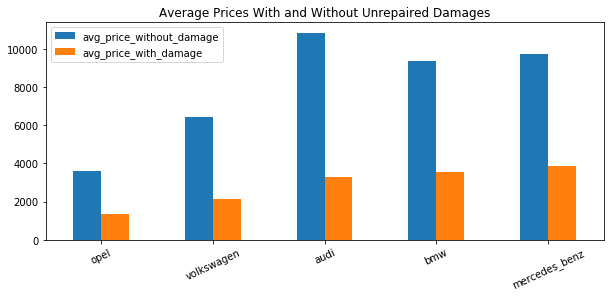

In [32]:
# visualize the prices with and without unrepaired_damage
import matplotlib.pyplot as plt
damage_price_sum.plot.bar('index', ['avg_price_without_damage',
                         'avg_price_with_damage'], 
                          rot = 25, figsize = (10,4))
plt.xlabel('')
plt.title('Average Prices With and Without Unrepaired Damages')
plt.show()

Cars with unrepaired damages are listed with average prices about one third of the completed repaired or no damaged cars. <br>

It is noticeable that high-class brands such as audi, bmw, mercedes_benz, average prices for reused cars reduced significantly if it has unrepaired damage. It totally understandable as the cost to fix or parts to replace these car brands are much higher.

## Conclusion
The project is to find the most common car brands that are listed on eBay for resell and how brand, mileage and damages factors in the resell price.<br>

Opel has cheapest average resell price and is the second most popular listed used cars. <br>

Volkswager gains its first place in popularity by the affordability element. They are listed about half the price of more well-known high-class brands like Audi, BMW, Mercedes_Benz.<br>

If comparing mileages between brands, the average mileages does not vary much, though prices show big difference. It could be explained by the well-known factor of car brand.<br>

Car with unrepaired damages are listed much lower than the ones without.